In [1]:
import numpy
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D,Dense, Activation,Flatten

Using TensorFlow backend.


In [2]:
model = Sequential()

model.add(Conv2D(32,(3,3), padding = 'same',
                input_shape=(128, 128, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64,(3,3),padding = 'same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.0001,decay = 1e-6)
model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 63, 63, 64)       

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                 shear_range = 0.2,
                 zoom_range = 0.2,
                 horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('/content/drive/My Drive/image_data/train',
                target_size = (128, 128),
                batch_size = 32,
                class_mode = 'categorical')
test_set= test_datagen.flow_from_directory('/content/drive/My Drive/image_data/validation',
                  target_size = (128, 128),
                  batch_size = 32,
                  class_mode = 'categorical')


Found 363 images belonging to 3 classes.
Found 63 images belonging to 3 classes.


In [6]:
history= model.fit_generator(training_set,
          steps_per_epoch=300,
          epochs = 20,
        validation_data = test_set,
        validation_steps=50)
score = model.evaluate(test_set,verbose= 0)
print('Test loss :',score[0])
print('Test accuracy :',score[1])

Epoch 1/20
300/300 [==============================] - 851s 3s/step - loss: 0.5901 - accuracy: 0.7370 - val_loss: 0.2272 - val_accuracy: 0.9206
Epoch 2/20
300/300 [==============================] - 783s 3s/step - loss: 0.2475 - accuracy: 0.9005 - val_loss: 0.1378 - val_accuracy: 0.9048
Epoch 3/20
300/300 [==============================] - 786s 3s/step - loss: 0.1523 - accuracy: 0.9408 - val_loss: 0.0120 - val_accuracy: 0.9683
Epoch 4/20
300/300 [==============================] - 786s 3s/step - loss: 0.1099 - accuracy: 0.9586 - val_loss: 0.0336 - val_accuracy: 0.9365
Epoch 5/20
300/300 [==============================] - 783s 3s/step - loss: 0.0929 - accuracy: 0.9622 - val_loss: 0.0589 - val_accuracy: 0.9524
Epoch 6/20
300/300 [==============================] - 779s 3s/step - loss: 0.0838 - accuracy: 0.9675 - val_loss: 0.1130 - val_accuracy: 0.9683
Epoch 7/20
300/300 [==============================] - 783s 3s/step - loss: 0.0760 - accuracy: 0.9658 - val_loss: 0.0925 - val_accuracy: 0.9365

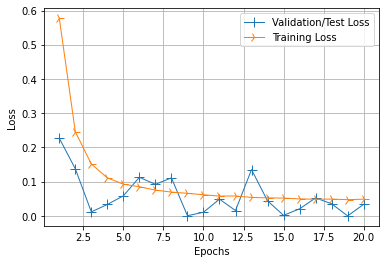

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label = 'Training Loss')
plt.setp(line1, linewidth=1.0, marker='+',markersize=10.0)
plt.setp(line2, linewidth=1.0, marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

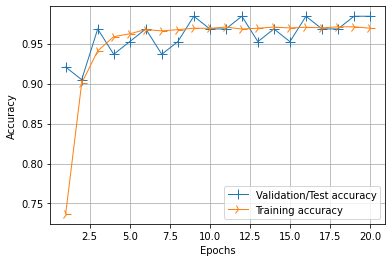

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test accuracy')
line2 = plt.plot(epochs, acc_values, label = 'Training accuracy')
plt.setp(line1, linewidth=1.0, marker='+',markersize=10.0)
plt.setp(line2, linewidth=1.0, marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
model.save('image_classification')


In [10]:
from keras.models import load_model
classifier = load_model('image_classification')

In [16]:
import numpy as np
from keras.preprocessing import image
def testing_image(image_path):
    test_image = image.load_img(image_directory, target_size = (128, 128))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(x = test_image)
    if result[0][0]==1:
      predicted_value='saree'
    elif result[0][1]==1:
      predicted_value='shirt'
    elif result[0][2]==1:
      predicted_value='tshirt'
    return predicted_value
    

In [17]:
print(testing_image('/content/img_5.jpeg'))

saree
